Skewness before transformation:
 Points                1.181533
Pole Positions        2.506133
No of Fastest Laps    1.273584
Wins                  3.986967
Podiums               1.384612
DNFs                 -0.064696
dtype: float64

Skewness after transformation:
 Points               -0.308723
Pole Positions        1.847338
No of Fastest Laps    0.835205
Wins                  2.535908
Podiums               1.013628
DNFs                 -1.153847
dtype: float64


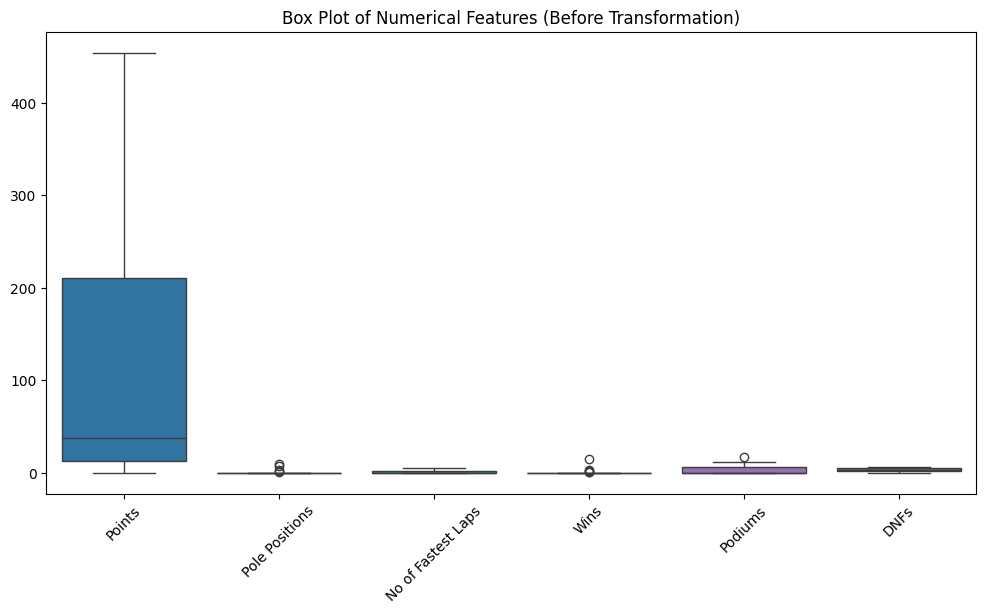

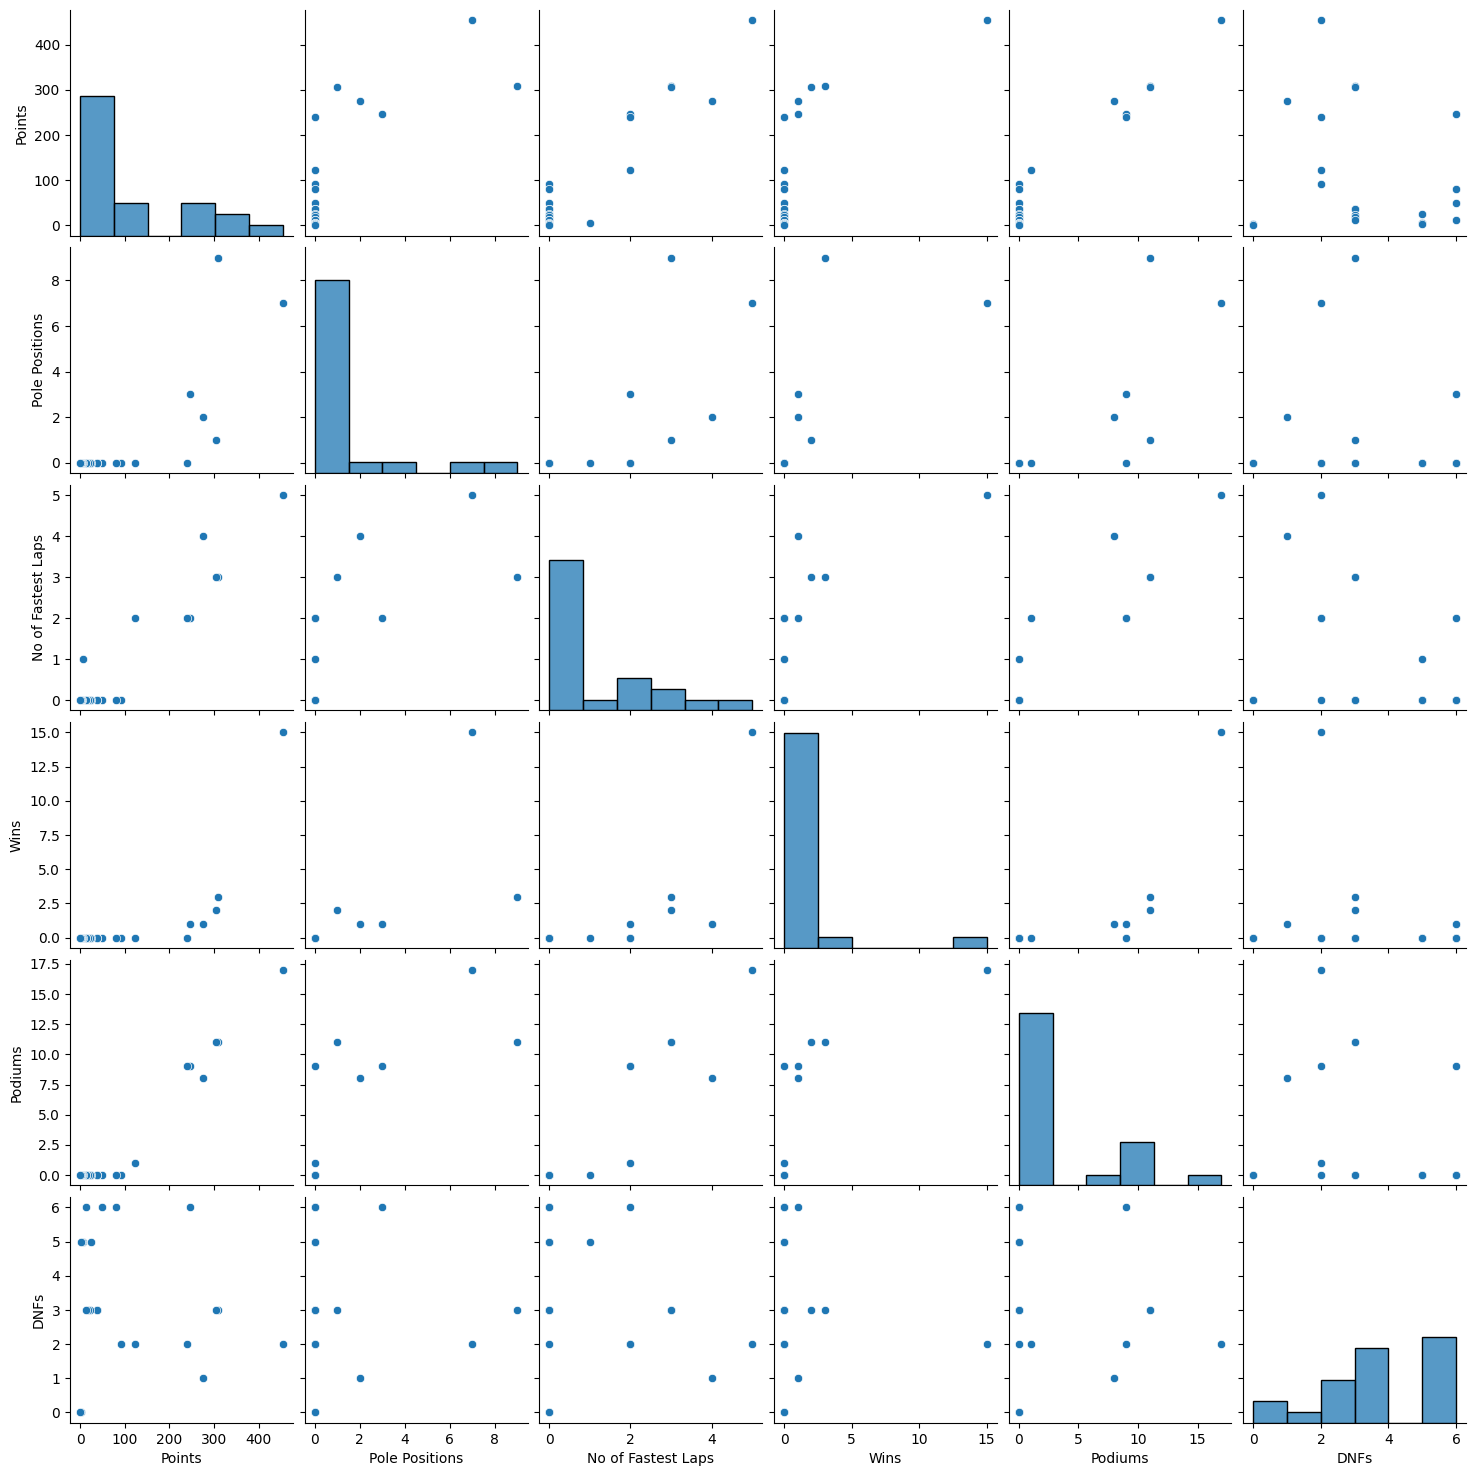


Outliers detected:
Points                0
Pole Positions        5
No of Fastest Laps    0
Wins                  5
Podiums               1
DNFs                  0
dtype: int64

Linear Regression Performance:
MAE: 0.5989082141487044
MSE: 0.8032343780095814
R2 Score: 0.5815541038212204

Decision Tree Performance:
MAE: 0.5708231300106658
MSE: 0.7780324412099794
R2 Score: 0.5946830825082166

Random Forest Performance:
MAE: 0.600299260850443
MSE: 0.7456601693302903
R2 Score: 0.6115474557084857


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


file_path = "/content/F1_2022_data.csv"
df = pd.read_csv(file_path)

numerical_cols = ["Points", "Pole Positions", "No of Fastest Laps", "Wins", "Podiums", "DNFs"]

print("Skewness before transformation:\n", df[numerical_cols].apply(skew))

df_transformed = df.copy()
df_transformed[numerical_cols] = np.log1p(df[numerical_cols])

print("\nSkewness after transformation:\n", df_transformed[numerical_cols].apply(skew))

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Box Plot of Numerical Features (Before Transformation)")
plt.xticks(rotation=45)
plt.show()

sns.pairplot(df[numerical_cols])
plt.show()

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
print("\nOutliers detected:")
print(outliers.sum())

X = df_transformed[["Pole Positions", "No of Fastest Laps", "Wins", "Podiums"]]
y = df_transformed["Points"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2 Score: {r2_score(y_test, y_pred)}")
